In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 

# Множественная регрессия

**Условия применения:**

1. Линейная зависимость переменных
2. Остатки нормально распределены
3. Переменные нормально распределены (если верен пункт 2, то необязательно)
4. Проверка на гетероскедастичность (различия в дисперсии на разных уровнях НП, дисперсия должна быть примерно одинакова)
5. Проверка на мультиколлинеарность (сильная корреляция между независимыми переменными)

In [7]:
y = np.random.randint(1, 100, 20)
x1 = np.random.randint(20, 100, 20)
x2 = np.random.randint(50, 100, 20)
x3 = np.random.randint(80, 100, 20)
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

In [21]:
X = sm.add_constant(data[['x1', 'x2', 'x3']])
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2.653
Date:                Tue, 27 Jun 2023   Prob (F-statistic):             0.0839
Time:                        13:51:41   Log-Likelihood:                -88.585
No. Observations:                  20   AIC:                             185.2
Df Residuals:                      16   BIC:                             189.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.9526     90.533      3.092      0.0

In [22]:
# второй способ (более удобный)
results = smf.ols('y ~ x1 + x2 + x3', data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2.653
Date:                Tue, 27 Jun 2023   Prob (F-statistic):             0.0839
Time:                        13:52:48   Log-Likelihood:                -88.585
No. Observations:                  20   AIC:                             185.2
Df Residuals:                      16   BIC:                             189.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    279.9526     90.533      3.092      0.007      88.032     471.873
x1            -0.1213      0.219     -0.554      0.587      -0.585       0.343
x2            -0.5156      0.343     -1.502      0.153      -1.243       0.212
x3            -1.9430      0.983     -1.976      0.066      -4.028       0.142
==============================================================================
Omnibus:                        0.395   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.821   Jarque-Bera (JB):                0.384
Skew:                          -0.279   Prob(JB):                        0.825
Kurtosis:                       2.614   Cond. No.                     2.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

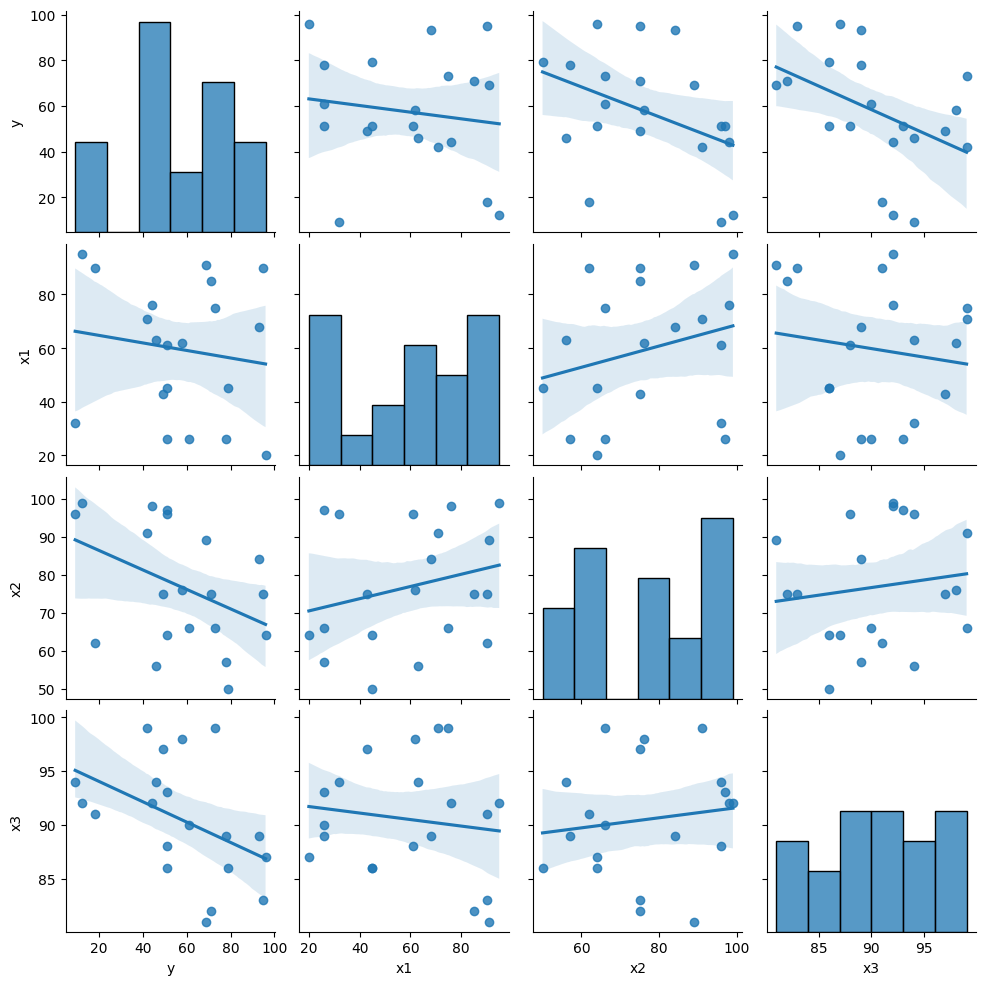

In [23]:
sns.pairplot(data, kind='reg')

# Логистическая регрессия

In [43]:
y = np.random.randint(0, 2, 20)
x1 = np.random.randint(0, 2, 20)
x2 = np.random.randint(0, 2, 20)
x3 = np.random.randint(0, 2, 20)
data = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})

In [44]:
X = sm.add_constant(data[['x1', 'x2', 'x3']])
model = sm.Logit(y, X)
results = model.fit()
results.summary()

         Current function value: 0.363563
         Iterations: 35


C:\Users\Данила\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.4598
Time:                        14:00:21   Log-Likelihood:                -7.2713
converged:                      False   LL-Null:                       -13.460
Covariance Type:            nonrobust   LLR p-value:                  0.006195
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3299   5.04e+04      0.000      1.000   -9.88e+04    9.88e+04
x1           -24.4285   5.04e+04     -0.000      1.000   -9.88e+04    9.88e+04
x2           -23.3299   5.04e+04     -0.000      1.000   -9.88e+04    9.88e+04
x3          2.443e-10      1.461   1.67e-10      1.000      -2.863       2.863
==============================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [45]:
# второй способ
results = smf.logit('y ~ x1 + x2 + x3', data).fit()
results.summary()

         Current function value: 0.363563
         Iterations: 35


C:\Users\Данила\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.4598
Time:                        14:01:14   Log-Likelihood:                -7.2713
converged:                      False   LL-Null:                       -13.460
Covariance Type:            nonrobust   LLR p-value:                  0.006195
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3299   5.04e+04      0.000      1.000   -9.88e+04    9.88e+04
x1           -24.4285   5.04e+04     -0.000      1.000   -9.88e+04    9.88e+04
x2           -23.3299   5.04e+04     -0.000      1.000   -9.88e+04    9.88e+04
x3          2.444e-10      1.461   1.67e-10      1.000      -2.863       2.863
==============================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Здесь $R^2 $ называется pseudo $R^2$. Это аналог $R^2$ для логистических моделей, обладающий сходной практической интерпретацией